# Preparing Time Series from Wide-Form Data Core

**Student:** Matthew Malueg

## Loading and Importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Customization options
plt.rcParams['figure.facecolor']='white'
plt.rcParams['figure.figsize']=(12,4)
# Import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
sns.set_context("talk", font_scale=0.9)

In [3]:
# Custom function for formatting y-axis to thousands of dollars, 'K'
def thousands(x, pos):
    """Use with matplotlib FuncFormatter - formats y-axis into thousands"""
    new_x = x/1000
    return f"{new_x:,.0f}K"
fmt_thous = mticks.FuncFormatter(thousands)

**Load and preview dataframe**

In [4]:
df = pd.read_csv("Data/City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month - City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
display(df.head())
df.info()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22467 entries, 0 to 22466
Columns: 281 entries, RegionID to 2022-09-30
dtypes: float64(273), int64(2), object(6)
memory usage: 48.2+ MB


## Data Preparation and Visualization

### Part 1

In [5]:
# Filter the four largest cities (0-3 for SizeRank)
four_largest = df[df['SizeRank'] < 4]
four_largest.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


In [6]:
# Melt the data into long-form
melted = pd.melt(four_largest, id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType',
                                        'StateName', 'State', 'Metro', 'CountyName'],
                 value_name='HomeValue', var_name='SaleDate')

In [7]:
# Convert SaleDate to datetime type
melted['SaleDate'] = pd.to_datetime(melted['SaleDate'])
# Set SaleDate as index
melted = melted.set_index('SaleDate')
melted.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,HomeValue
SaleDate,,,,,,,,,
2000-01-31,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0
2000-01-31,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0
2000-01-31,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0
2000-01-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0
2000-02-29,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,255517.0


In [8]:
# Resample the dataframe as monthly frequency, grouped by City
melted_ts = melted.groupby('RegionName').resample('M').sum(numeric_only=True)
melted_ts

RegionID  SizeRank  HomeValue
RegionName SaleDate                                 
Chicago    2000-01-31     17426         3   166139.0
           2000-02-29     17426         3   166536.0
           2000-03-31     17426         3   167368.0
           2000-04-30     17426         3   168826.0
           2000-05-31     17426         3   170499.0
...                         ...       ...        ...
New York   2022-05-31      6181         0   768797.0
           2022-06-30      6181         0   773944.0
           2022-07-31      6181         0   777692.0
           2022-08-31      6181         0   779960.0
           2022-09-30      6181         0   781622.0

[1092 rows x 3 columns]

### Part 2

**Plot the home values for all 4 cities.**

In [9]:
## Plot the home values for all 4 cities
# First use unstack to get cities and home values in columns
unstacked_values = melted_ts['HomeValue'].unstack(level=0)
unstacked_values

RegionName,Chicago,Houston,Los Angeles,New York
SaleDate,,,,
2000-01-31,166139.0,109068.0,234181.0,253690.0
2000-02-29,166536.0,109079.0,234401.0,255517.0
2000-03-31,167368.0,108878.0,235513.0,257207.0
2000-04-30,168826.0,108881.0,237589.0,260310.0
2000-05-31,170499.0,108834.0,240113.0,263204.0
...,...,...,...,...
2022-05-31,312487.0,265558.0,990391.0,768797.0
2022-06-30,314663.0,268901.0,992337.0,773944.0
2022-07-31,315910.0,271059.0,992630.0,777692.0


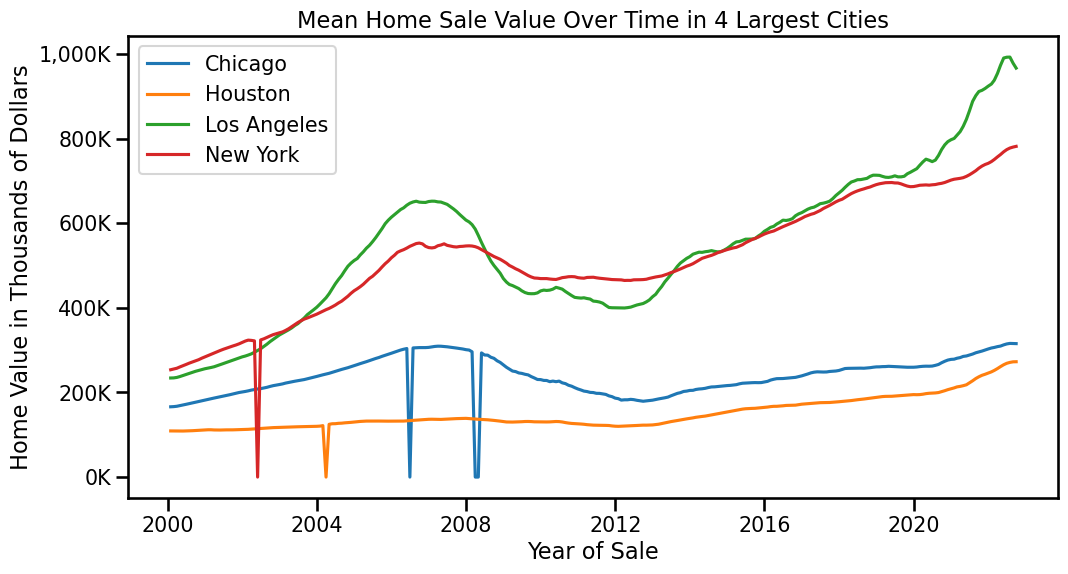

In [10]:
# Second, reformat the y-axis to use thousands of dollars, labeled with 'K' at the end
fig1, ax1 = plt.subplots(figsize=(12,6))
ax1.plot(unstacked_values)
ax1.set_ylabel('Home Value in Thousands of Dollars')
ax1.set_xlabel('Year of Sale')
ax1.set_title('Mean Home Sale Value Over Time in 4 Largest Cities')
ax1.yaxis.set_major_formatter(fmt_thous)
ax1.legend(unstacked_values.columns);

**Answer the following:**
1. Which city had the highest Typical Home Value at the end of 2008? Which had the least?
2. How much did the home values change from November 2008 to December 2008?

In [11]:
# Slice out data for the end of 2008
sliced = unstacked_values.loc[pd.IndexSlice['12/2008']]
sliced

RegionName,Chicago,Houston,Los Angeles,New York
SaleDate,,,,
2008-12-31,265306.0,131283.0,469294.0,510309.0


**1)** At the end of 2008, New York had the highest typical home value, while Houston had the least.

In [12]:
## Find the difference in values between Nov and Dec 2008
# Create a dataframe of differenced values
diff_vals = unstacked_values.diff()
# Slice out data for Dec (diff from Nov)
sliced_diff = diff_vals.loc[pd.IndexSlice['12/2008']]
sliced_diff

RegionName,Chicago,Houston,Los Angeles,New York
SaleDate,,,,
2008-12-31,-5753.0,-964.0,-12611.0,-4458.0


**2)** At the end of December 2008, typical home prices had changed by the following amount compared to November:
- Chicago: ($5,753)
  
- Houston: ($964)
  
- Los Angeles: ($12,611)

- New York: ($4,458)